In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('Salary_Data.csv')
df_binary = df[['YearsExperience', 'Salary']]

 # Taking only the selected two attributes from the dataset
df_binary.columns = ['Experience', 'Sal']
 #display the first 5 rows
df_binary.head()

,Experience,Sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


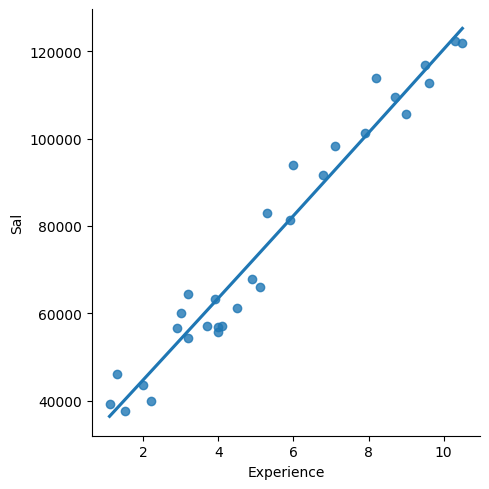

In [4]:
#plotting the Scatter plot to check relationship between Sal and Temp
sns.lmplot(x ="Experience", y ="Sal", data = df_binary, order = 2, ci = None)

In [6]:
# Eliminating NaN or missing input numbers
df_binary.fillna(method ='ffill', inplace = True)

In [7]:
X = np.array(df_binary['Experience']).reshape(-1, 1)
y = np.array(df_binary['Sal']).reshape(-1, 1)
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

 # Splitting the data into training and testing data
regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.8829085450981414


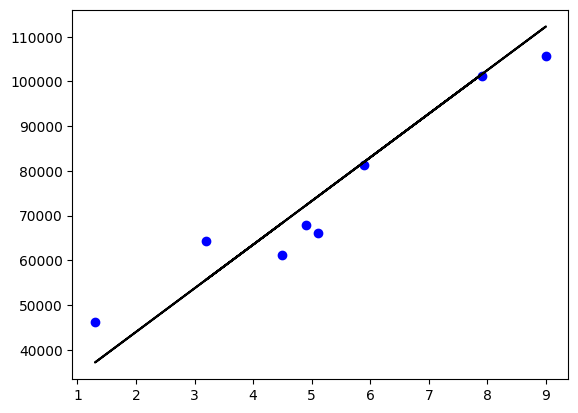

In [8]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')

plt.show()
 # Data scatter of predicted values

In [9]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 5657.760365622036
MSE: 42838189.42759636
RMSE: 6545.088954903238
